#Import Libraries For Helper Functions

In [7]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def distEuclidean(firstVec, secondVec, columns):
    distance = 0
    for i in columns:
        distance += (firstVec[i] - secondVec[i]) ** 2
    return np.sqrt(distance)

In [3]:
def ZScoreNormalization(features):
  mean = np.mean(features)
  stdDev = np.std(features)
  data = (features - mean) / stdDev
  return data

In [12]:
def forwardSelection(data):
    #print(len(data), len(data[0]))
    dataset = ZScoreNormalization(data) #ZScore Normalization, Mean = 0, Standard Deviation = 1
    #print(dataset)
    bestSoFar = 0.0
    bestFeatureSet = set()
    currFeatureSet = set()
    cutOffCounter = 0
    accuracyList = []
    levels = []
    #loops once outer for each feature
    for i in range(1, len(dataset[0])):
        print(f"Best Accuracy and Features until now: {bestSoFar*100:.2f}% {bestFeatureSet}") # Checkpointing
        print(f"Currently evaluating level {i} of the search tree")
        levels.append(i)
        currentBest = 0
        featureToAdd = None
        #loops same number of times for during each outer loop
        for feature in range(1, len(dataset[0])): #1 to n since n = features + labels and 0th column is labels
            if feature not in currFeatureSet:
                print("Consider Adding feature:", feature)
                tempFeatures = list(currFeatureSet) #temporary copy
                tempFeatures.append(feature) #adding newest entry and testing how that affects accuracy in the search
                correctClassification = 0 #successful classifications
                minDist = math.inf # To find minimum distance
                #applying the Euclidean distance function to each row's comparison as a vector
                for row1 in dataset:
                    minDist = math.inf
                    for row2 in dataset:
                        duplicate = (row1 == row2).all()
                        if not duplicate:
                            value = distEuclidean(row1 , row2, tempFeatures)
                            if value < minDist:
                                minDist = value
                                prediction_class = row2[0]
                    if prediction_class == row1[0]:
                        correctClassification += 1
                accuracy = correctClassification / (len(dataset))  #measuring accuracy

                # determining if recently-stored correctness needs to be updated so that it reflects both globally and in the current working copy.
                if accuracy > currentBest:
                    currentBest = accuracy
                    featureToAdd = feature
        currFeatureSet.add(featureToAdd)
        print(f"At iteration {i} we added feature {featureToAdd} to current set")
        print(f"Using feature(s) {currFeatureSet} the accuracy is {currentBest*100:.2f}%")
        accuracyList.append(currentBest)
        if featureToAdd and currentBest > bestSoFar:  #print operations to display progress and results
              print(f"From {bestSoFar*100:.2f}%")
              bestSoFar = currentBest
              print(f"To {bestSoFar*100:.2f}%")
              print("******************************")
              bestFeatureSet = set(currFeatureSet)
        else:
            cutOffCounter += 1
            if cutOffCounter > 2: # Depth of tree is len(dataset[0]), we cut it off if accuracy does not increase 
                print("More than 2 levels of the tree have been explored and accuracy only decreased, ending search.")
                break             # for over 2 of the levels as mentioned in the slides for reducing time of search.

    print(f"Finished Search!! The complete best feature subset is {bestFeatureSet} which has an accuracy of {bestSoFar*100:.2f}%")
    plt.plot(levels, accuracyList)
    plt.xlabel("Level of the Search Tree")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [5]:
def backward_elimination(data):
  dataset = ZScoreNormalization(data) #ZScore Normalization, Mean = 0, Standard Deviation = 1
  best_accuracy_so_far = 0.0
  best_feature_set = set()
  current_feature_set = set([features for features in range(1, len(dataset[0]))])
  #loops once outer for each feature
  for i in range(1, len(dataset[0])):
    worst_set = 0 #keep a track of the value to be removed
    current_best_accuracy = 0
    print(f"Best Accuracy and Features until now: {best_accuracy_so_far*100:.2f}% {best_feature_set} ") # Checkpointing
    for j in range(1, len(dataset[0])):
      if j in current_feature_set:
        print(f"Feature {j} is considered for elimination")
        current_features_copy = set(current_feature_set) ##copy of current list of features for testing
        current_features_copy.remove(j)  #Adding the most recent entry and evaluating its impact on search accuracy
        classifications = 0 #keep track of successful classifications
        #shortest_distance = math.inf
        pred_class = 0
        # using the euclidean distance function to compare each feature across rows as a vector
        for x in dataset:
          shortest_distance = math.inf
          for y in dataset:
            identical = (x == y).all()
            if not identical: # to not check distance to same sample
              val = distEuclidean(x , y , current_features_copy)
              if val < shortest_distance:
                shortest_distance = val
                pred_class = y[0]
          if pred_class == x[0]:
            classifications += 1
        accuracy = classifications / (len(dataset))  #to measure accuracy
        #to check for global and current updation
        if accuracy > current_best_accuracy:
          current_best_accuracy = accuracy
          worst_set = j
    if worst_set in current_feature_set:
        current_feature_set.remove(worst_set)
                #print operatings to display progress and results
        print(f"Feature {worst_set} was removed from the current set of features at level {i}")
        print(f"With the features {current_feature_set} ,the accuracy is {current_best_accuracy * 100:.2f}% ")
    if current_best_accuracy  >= best_accuracy_so_far:
        best_accuracy_so_far = current_best_accuracy
        best_feature_set = set(current_feature_set)
  print("Completed !")
  print(f"The best feature set is : {best_feature_set}, with an accuracy of {best_accuracy_so_far*100:.2f}%" )


# Small Dataset Feature Search

Feature Selection


Data contains 10 features with 1000 samples 
Beginning Search
Best Accuracy and Features until now: 0.00% set()
Currently evaluating level 1 of the search tree
Consider Adding feature: 1
Consider Adding feature: 2
Consider Adding feature: 3
Consider Adding feature: 4
Consider Adding feature: 5
Consider Adding feature: 6
Consider Adding feature: 7
Consider Adding feature: 8
Consider Adding feature: 9
Consider Adding feature: 10
At iteration 1 we added feature 5 to current set
Using feature(s) {5} the accuracy is 85.70%
From 0.00%
To 85.70%
******************************
Best Accuracy and Features until now: 85.70% {5}
Currently evaluating level 2 of the search tree
Consider Adding feature: 1
Consider Adding feature: 2
Consider Adding feature: 3
Consider Adding feature: 4
Consider Adding feature: 6
Consider Adding feature: 7
Consider Adding feature: 8
Consider Adding feature: 9
Consider Adding feature: 10
At iteration 2 we added feature 7 to current set
Using feature(

No handles with labels found to put in legend.


At iteration 5 we added feature 4 to current set
Using feature(s) {1, 4, 5, 7, 9} the accuracy is 88.60%
More than 2 levels of the tree have been explored and accuracy only decreased, ending search.
Finished Search!! The complete best feature subset is {5, 7} which has an accuracy of 96.30%


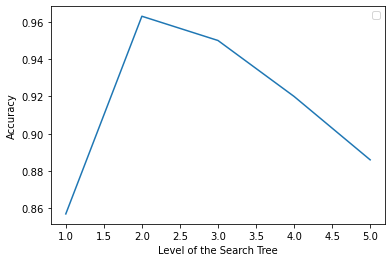

In [15]:
print("""Feature Selection\n""")

fileChoice = int(input("Data File to be used: 1: CS170_small_Data__20.txt, 2: CS170_large_Data__1.txt, 3: CS170_XXXLarge_Data__11.txt\n"))
algo = int(input("""\nAlgorithm \n
1. Forward Selection \n
2. Backward Elimination \n""" ))

file = None
if fileChoice == 2:
  file = "CS170_large_Data__1.txt"
elif fileChoice == 3:
  file = "CS170_XXXlarge_Data__11.txt"
else:
  file = "CS170_small_Data__20.txt"

try:
    with open(file) as d:
        data = pd.read_csv(file, delim_whitespace=True)
        dataLen = data.shape[0]
        loadDataset = np.loadtxt(file)
except:
    print("Error Loading File. Re-run and try again.")

# printing dataset details
print(f"\nData contains {len(loadDataset[0]) - 1} features with {dataLen + 1} samples ")
print("Beginning Search")
if algo == 1:
    forwardSelection(loadDataset)
elif algo == 2:
  backward_elimination(loadDataset)

# Large Dataset Feature Search

In [18]:
print("""Feature Selection\n""")

fileChoice = int(input("Data File to be used: 1: CS170_small_Data__20.txt, 2: CS170_large_Data__1.txt, 3: CS170_XXXLarge_Data__11.txt\n"))
algo = int(input("""\nAlgorithm \n
1. Forward Selection \n
2. Backward Elimination \n""" ))

file = None
if fileChoice == 2:
  file = "CS170_large_Data__1.txt"
elif fileChoice == 3:
  file = "CS170_XXXlarge_Data__11.txt"
else:
  file = "CS170_small_Data__20.txt"

try:
    with open(file) as d:
        data = pd.read_csv(file, delim_whitespace=True)
        dataLen = data.shape[0]
        loadDataset = np.loadtxt(file)
except:
    print("Error Loading File. Re-run and try again.")

# printing dataset details
print(f"\nData contains {len(loadDataset[0]) - 1} features with {dataLen + 1} samples ")
print("Beginning Search")
if algo == 1:
  forwardSelection(loadDataset)
elif algo == 2:
  backward_elimination(loadDataset)

Feature Selection


Data contains 20 features with 2000 samples 
Beginning Search
Best Accuracy and Features until now: 0.00% set() 
Currently evaluating level 1 of the search tree
Consider Adding feature: 1
Consider Adding feature: 2
Consider Adding feature: 3
Consider Adding feature: 4
Consider Adding feature: 5
Consider Adding feature: 6
Consider Adding feature: 7
Consider Adding feature: 8
Consider Adding feature: 9
Consider Adding feature: 10
Consider Adding feature: 11
Consider Adding feature: 12
Consider Adding feature: 13
Consider Adding feature: 14
Consider Adding feature: 15
Consider Adding feature: 16
Consider Adding feature: 17
Consider Adding feature: 18
Consider Adding feature: 19
Consider Adding feature: 20
At iteration 1 we added feature 11 to current set
Using feature(s) {11} the accuracy is 84.95%
From 0.00%
To 84.95%
******************************
Best Accuracy and Features until now: 84.95% {11} 
Currently evaluating level 2 of the search tree
Consider Adding featur

# XXXLargeDataset Feature Search

In [22]:
print("""Feature Selection\n""")

fileChoice = int(input("Data File to be used: 1: CS170_small_Data__20.txt, 2: CS170_large_Data__1.txt, 3: CS170_XXXLarge_Data__11.txt\n"))
algo = int(input("""\nAlgorithm \n
1. Forward Selection \n
2. Backward Elimination \n""" ))

file = None
if fileChoice == 2:
  file = "CS170_large_Data__1.txt"
elif fileChoice == 3:
  file = "CS170_XXXlarge_Data__11.txt"
else:
  file = "CS170_small_Data__20.txt"

try:
    with open(file) as d:
        data = pd.read_csv(file, delim_whitespace=True)
        dataLen = data.shape[0]
        loadDataset = np.loadtxt(file)
except:
    print("Error Loading File. Re-run and try again.")

# printing dataset details
print(f"\nData contains {len(loadDataset[0]) - 1} features with {dataLen + 1} samples ")
print("Beginning Search")
if algo == 1:
    forwardSelection(loadDataset)
elif algo == 2:
  backward_elimination(loadDataset)

Feature Selection


Data contains 80 features with 4000 samples 
Beginning Search
Best Accuracy and Features until now: 0.00% set()
Currently evaluating level 1 of the search tree
Consider Adding feature: 1
Consider Adding feature: 2
Consider Adding feature: 3
Consider Adding feature: 4
Consider Adding feature: 5
Consider Adding feature: 6
Consider Adding feature: 7
Consider Adding feature: 8
Consider Adding feature: 9
Consider Adding feature: 10
Consider Adding feature: 11
Consider Adding feature: 12
Consider Adding feature: 13
Consider Adding feature: 14
Consider Adding feature: 15
Consider Adding feature: 16
Consider Adding feature: 17
Consider Adding feature: 18
Consider Adding feature: 19
Consider Adding feature: 20
Consider Adding feature: 21
Consider Adding feature: 22
Consider Adding feature: 23
Consider Adding feature: 24
Consider Adding feature: 25
Consider Adding feature: 26
Consider Adding feature: 27
Consider Adding feature: 28
Consider Adding feature: 29
Consider Adding f

# Real World Dataset (Iris Dataset) Feature Search

Feature Selection


Data contains 4 features with 150 samples 
Beginning Search
Best Accuracy and Features until now: 0.00% set()
Currently evaluating level 1 of the search tree
Consider Adding feature: 1
Consider Adding feature: 2
Consider Adding feature: 3
Consider Adding feature: 4
At iteration 1 we added feature 2 to current set
Using feature(s) {2} the accuracy is 88.00%
From 0.00%
To 88.00%
******************************
Best Accuracy and Features until now: 88.00% {2}
Currently evaluating level 2 of the search tree
Consider Adding feature: 1
Consider Adding feature: 3
Consider Adding feature: 4
At iteration 2 we added feature 3 to current set
Using feature(s) {2, 3} the accuracy is 96.00%
From 88.00%
To 96.00%
******************************
Best Accuracy and Features until now: 96.00% {2, 3}
Currently evaluating level 3 of the search tree
Consider Adding feature: 1
Consider Adding feature: 4
At iteration 3 we added feature 1 to current set
Using feature(s) {1, 2, 3} the accuracy

No handles with labels found to put in legend.


At iteration 4 we added feature 4 to current set
Using feature(s) {1, 2, 3, 4} the accuracy is 96.00%
Finished Search!! The complete best feature subset is {2, 3} which has an accuracy of 96.00%


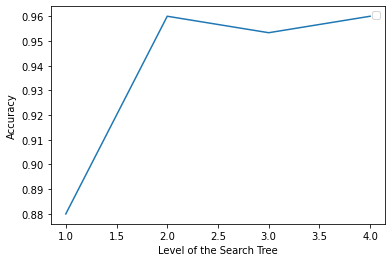

In [13]:
print("""Feature Selection\n""")

fileChoice = int(input("Data File to be used: 1: CS170_small_Data_20.txt, 2: CS170_large_Data1.txt, 3: CS170_XXXLarge_Data_11.txt, 4: Iris Dataset\n"))
algo = int(input("""\nAlgorithm \n
1. Forward Selection \n
2. Backward Elimination \n""" ))

file = None
if fileChoice == 2:
  file = "CS170_large_Data__1.txt"
elif fileChoice == 3:
  file = "CS170_XXXlarge_Data__11.txt"
elif fileChoice == 4:
  file = "Iris_Processed.csv"
else:
  file = "CS170_small_Data__20.txt"

labelMap = {b'Iris-setosa' : 1, b'Iris-versicolor' : 2, b'Iris-virginica' : 3}

try:
    with open(file) as d:
        if fileChoice == 4:
          data = pd.read_csv(file, header=None)
          dataLen = data.shape[0] - 1
          loadDataset = np.loadtxt(file, delimiter = ",")
        else:
          data = pd.read_csv(file, delim_whitespace=True)
          dataLen = data.shape[0]
          loadDataset = np.loadtxt(file)

except Exception as e:
    print("Error Loading File. Re-run and try again.")
    print(e)

# printing dataset details
print(f"\nData contains {len(loadDataset[0]) - 1} features with {dataLen + 1} samples ")
print("Beginning Search")
if algo == 1:
    forwardSelection(loadDataset)
elif algo == 2:
  backward_elimination(loadDataset)

# Level vs Accuracy Plot for Large Data

Feature Selection


Data contains 20 features with 2000 samples 
Beginning Search
Best Accuracy and Features until now: 0.00% set()
Currently evaluating level 1 of the search tree
Consider Adding feature: 1
Consider Adding feature: 2
Consider Adding feature: 3
Consider Adding feature: 4
Consider Adding feature: 5
Consider Adding feature: 6
Consider Adding feature: 7
Consider Adding feature: 8
Consider Adding feature: 9
Consider Adding feature: 10
Consider Adding feature: 11
Consider Adding feature: 12
Consider Adding feature: 13
Consider Adding feature: 14
Consider Adding feature: 15
Consider Adding feature: 16
Consider Adding feature: 17
Consider Adding feature: 18
Consider Adding feature: 19
Consider Adding feature: 20
At iteration 1 we added feature 11 to current set
Using feature(s) {11} the accuracy is 84.95%
From 0.00%
To 84.95%
******************************
Best Accuracy and Features until now: 84.95% {11}
Currently evaluating level 2 of the search tree
Consider Adding feature:

No handles with labels found to put in legend.


At iteration 5 we added feature 10 to current set
Using feature(s) {2, 6, 10, 11, 17} the accuracy is 90.35%
More than 2 levels of the tree have been explored and accuracy only decreased, ending search.
Finished Search!! The complete best feature subset is {17, 11} which has an accuracy of 96.95%


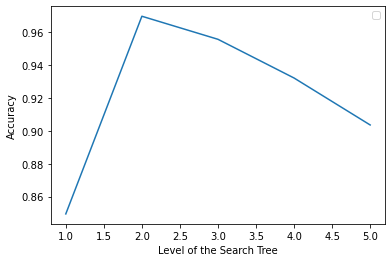

In [14]:
print("""Feature Selection\n""")

fileChoice = int(input("Data File to be used: 1: CS170_small_Data_20.txt, 2: CS170_large_Data1.txt, 3: CS170_XXXLarge_Data_11.txt, 4: Iris Dataset\n"))
algo = int(input("""\nAlgorithm \n
1. Forward Selection \n
2. Backward Elimination \n""" ))

file = None
if fileChoice == 2:
  file = "CS170_large_Data__1.txt"
elif fileChoice == 3:
  file = "CS170_XXXlarge_Data__11.txt"
elif fileChoice == 4:
  file = "Iris_Processed.csv"
else:
  file = "CS170_small_Data__20.txt"

labelMap = {b'Iris-setosa' : 1, b'Iris-versicolor' : 2, b'Iris-virginica' : 3}

try:
    with open(file) as d:
        if fileChoice == 4:
          data = pd.read_csv(file, header=None)
          dataLen = data.shape[0] - 1
          loadDataset = np.loadtxt(file, delimiter = ",")
        else:
          data = pd.read_csv(file, delim_whitespace=True)
          dataLen = data.shape[0]
          loadDataset = np.loadtxt(file)

except Exception as e:
    print("Error Loading File. Re-run and try again.")
    print(e)

# printing dataset details
print(f"\nData contains {len(loadDataset[0]) - 1} features with {dataLen + 1} samples ")
print("Beginning Search")
if algo == 1:
    forwardSelection(loadDataset)
elif algo == 2:
  backward_elimination(loadDataset)